# Exercise 6.4: Supervised Machine Learning – Linear Regression

In this notebook, I’m running a simple linear regression to test out a hypothesis based on one of the relationships I spotted back in Exercise 6.2. I’ll walk through the process step by step prepping the data, building the model, and checking how well it actually performs.

## Table of Contents

## Table of Contents

1. [Import Libraries](#1.-Import-Libraries)  
2. [Load Data](#2.-Load-Data)  
3. [Data Cleaning](#3.-Data-Cleaning)  
4. [Exploring the Question: Could better alignment between law and culture help unlock fertility stability in struggling regions?](#4.-Exploring-the-Question:-Could-better-alignment-between-law-and-culture-help-unlock-fertility-stability-in-struggling-regions?)  
5. [Are there early indicators (like trust in public institutions or civic participation) that predict where policy will be effective?](#5.-Are-there-early-indicators-(like-trust-in-public-institutions-or-civic-participation)-that-predict-where-policy-will-be-effective?)  
6. [What helps legal protections take hold in low-trust countries community-led initiatives? better communication? targeted investments?](#6.-What-helps-legal-protections-take-hold-in-low-trust-countries-community-led-initiatives?-better-communication?-targeted-investments?)
7. [Final Thoughts and Reflections](#7.-Final-Thoughts-and-Reflections)

---

## 1. Import Libraries

In [9]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Display plots inline
%matplotlib inline

These libraries cover everything we’ll need — from data wrangling (`pandas`, `numpy`) and plotting (`matplotlib`, `seaborn`) to building and evaluating the regression model (`scikit-learn`).

---

## 2. Load Data

In [22]:
# Load merged dataset
df = pd.read_csv(r'D:\YVC\Data Analytics (CF)\Advanced Analytics & Dashboard Design\Project Analysis\02 Data\Prepared Data\final_merged_data.csv')

# Preview the first few rows
df.head()

,Country,Total_Benefits,Cash,Services,Tax_Breaks,Childcare_0_2,Childcare_3_5,Early_Education,Fertility_Rate
0,France,3.439601,1.335785,1.376677,0.727139,1.264842,0.597573,0.667269,1.639
1,Sweden,3.420961,1.290414,2.130547,0.000000,1.563593,1.029800,0.533793,1.430
2,Denmark,3.313367,1.268997,2.044370,0.000000,1.238141,0.796111,0.442030,1.511
3,Norway,3.276841,1.224974,1.962067,0.089800,1.376063,0.653655,0.722408,1.405
4,Germany,3.240882,1.075665,1.344086,0.821131,0.750781,0.243525,0.507256,1.441


In [24]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          18 non-null     object 
 1   Total_Benefits   18 non-null     float64
 2   Cash             18 non-null     float64
 3   Services         18 non-null     float64
 4   Tax_Breaks       18 non-null     float64
 5   Childcare_0_2    18 non-null     float64
 6   Childcare_3_5    18 non-null     float64
 7   Early_Education  18 non-null     float64
 8   Fertility_Rate   18 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.4+ KB


---

## 3. Data Cleaning

In [28]:
# Check for missing values
df.isnull().sum()

Country            0
Total_Benefits     0
Cash               0
Services           0
Tax_Breaks         0
Childcare_0_2      0
Childcare_3_5      0
Early_Education    0
Fertility_Rate     0
dtype: int64

In [30]:
# Check for duplicates
df.duplicated().sum()

0

I’m checking for any missing values or duplicates to make sure the dataset is clean before moving forward. Cleaning the data helps make the model more accurate and reliable.

---

# ------------------------------------
## 4. Exploring the Question: Could better alignment between law and culture help unlock fertility stability in struggling regions?
# ------------------------------------

### Fertility Rate vs Total_Benefits
This chart explores the relationship between total family benefits and fertility rate.

#### Exploratory Data Analysis (EDA)

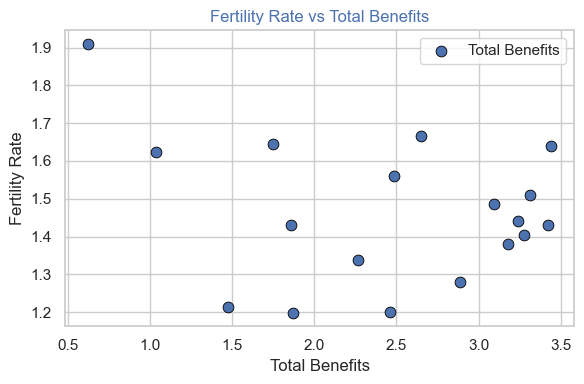

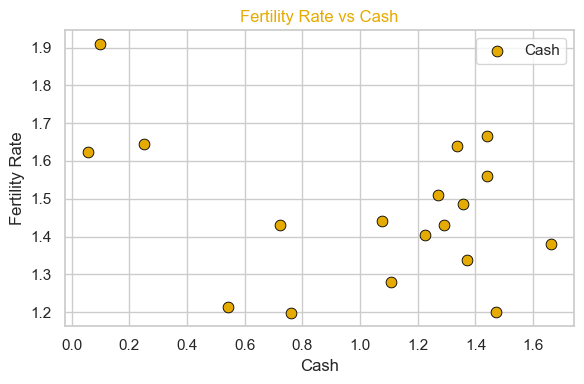

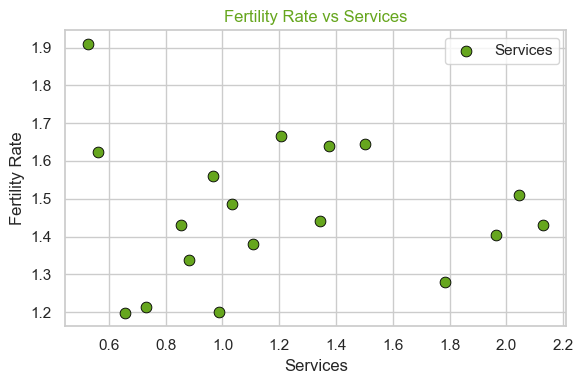

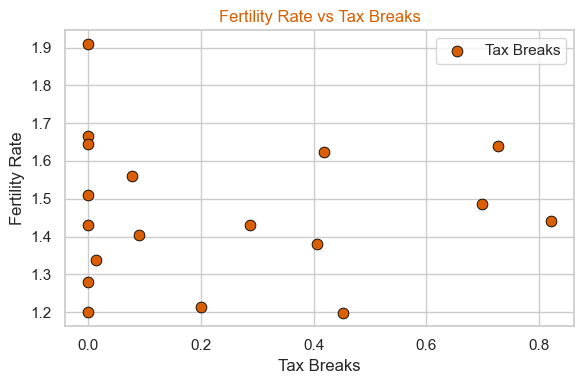

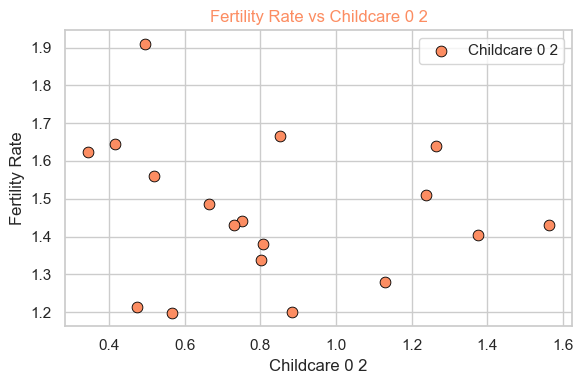

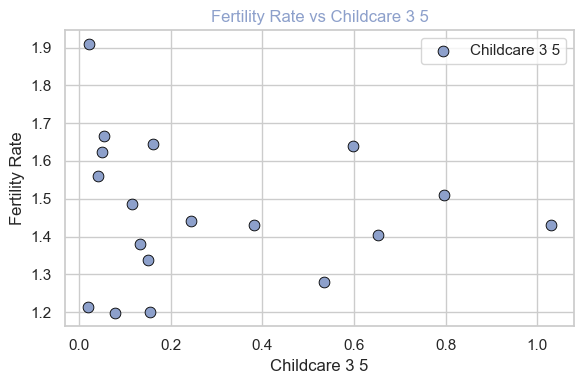

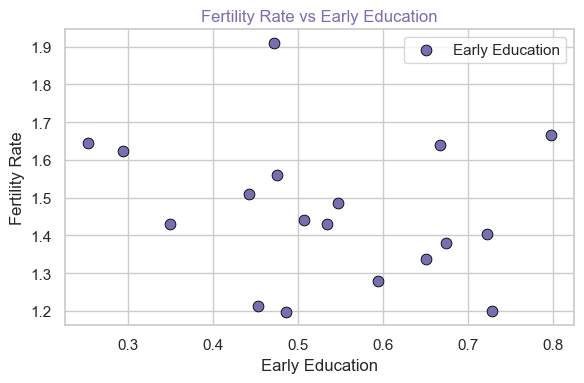

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

# List of predictors to visualize
predictors = [
    'Total_Benefits', 'Cash', 'Services', 'Tax_Breaks',
    'Childcare_0_2', 'Childcare_3_5', 'Early_Education'
]

# Custom color mapping
custom_colors = {
    'Fertility_Rate': '#1B9E77',         # Teal Green – life/growth
    'Total_Benefits': '#4C72B0',         # Steel Blue – general policy
    'Cash': '#E6AB02',                   # Gold – money
    'Services': '#66A61E',               # Forest Green – infrastructure
    'Tax_Breaks': '#D95F02',             # Burnt Orange – incentives
    'Childcare_0_2': '#FC8D62',          # Soft Coral – infants
    'Childcare_3_5': '#8DA0CB',          # Muted Violet – toddlers
    'Early_Education': '#7570B3'         # Deep Purple – schooling
}

# Create scatterplots
for col in predictors:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        x=df[col],
        y=df['Fertility_Rate'],
        color=custom_colors[col],
        s=60,
        edgecolor='black',
        label=col.replace('_', ' ')
    )
    plt.title(f'Fertility Rate vs {col.replace("_", " ")}', fontsize=12, color=custom_colors[col])
    plt.xlabel(col.replace('_', ' '))
    plt.ylabel('Fertility Rate')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

### Hypothesis

**6.3 Research Question:**  
Can better alignment between law and culture help improve fertility stability in regions that are struggling?

**Hypothesis:**  
I’m exploring whether higher direct cash benefits for families are linked to higher fertility rates. The idea is that financial support might act as a stand-in for policies that really connect with the culture and social norms of a place. If there’s a clear relationship here, it could suggest that legal policies like cash support are more effective when they line up with how people actually live and think about family planning.

---

## Feature Engineering

In [62]:
# Define predictor and target
X = df['Cash'].values.reshape(-1, 1)
y = df['Fertility_Rate'].values.reshape(-1, 1)

# Quick check of shapes
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (18, 1)
y shape: (18, 1)


I’m reshaping the `Cash` and `Fertility_Rate` columns into the format the model needs two clean columns of numbers with the right shape. This step makes sure my inputs and target are ready for scikit-learn to handle in the next phase.

---

## Train/Test Split

Data is now ready, I'm splitting it into a training set and a test set. The training set will be used to build the model, and the test set will help me see how well it performs on new, unseen data. 

I'm going with an 80/20 split and setting a random state to keep things consistent if I need to rerun it later.

In [68]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (14, 1)
X_test: (4, 1)
y_train: (14, 1)
y_test: (4, 1)


---

## Model Building

The data’s split, it’s time to train the model. I’m using a simple linear regression here to explore the connection between direct cash benefits and fertility rates. Let’s fit the model to the training data and see how well it captures the pattern.

In [83]:
# Import and fit the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Check model coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: [1.62881768]
Coefficient: [-0.20087146]


---

## Model Evaluation – Predictions and Plot

Time to see how this model actually performs. I’ll start by using the model to make predictions on the test data. Then, I’ll plot the results to get a visual sense of how well the regression line fits.

This will help me see if the relationship between cash benefits and fertility rate is consistent for new, unseen data.

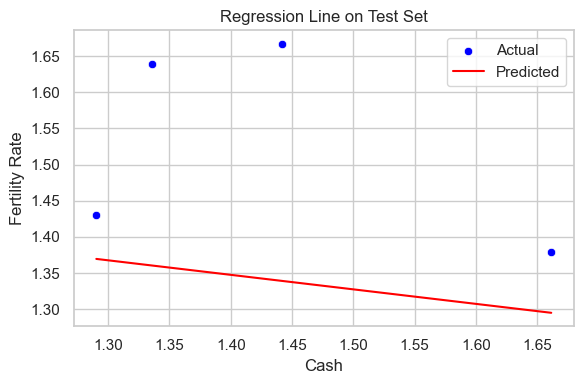

In [87]:
# Predict y values using the test set
y_pred = model.predict(X_test)

# Plot the regression line with the test set
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), color='blue', label='Actual')
sns.lineplot(x=X_test.flatten(), y=y_pred.flatten(), color='red', label='Predicted')
plt.title('Regression Line on Test Set')
plt.xlabel('Cash')
plt.ylabel('Fertility Rate')
plt.legend()
plt.tight_layout()
plt.show()

---

### Model Evaluation – Performance Metrics

Checking how well the model actually performed using two standard metrics: Mean Squared Error and R² score. 

- MSE tells me how far off the predictions are, on average.
- R² tells me how much of the variance in fertility rates is explained by the amount of cash benefits provided.

These numbers will help me figure out whether cash benefits have a meaningful relationship with fertility rates and whether they could potentially act as a proxy for policy alignment with cultural expectations.

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.0489
R² Score: -2.0844


## Answer to 6.3 Research Question
---

**Could better alignment between law and culture help unlock fertility stability in struggling regions?**

I ran a simple linear regression to explore whether direct cash benefits (as a form of legal support) are linked to fertility rates. The idea was to test if these policies could reflect or support cultural needs and expectations around family life.

The results didn’t show a strong relationship. The R² score was actually negative, which means the model couldn’t explain the variation in fertility rates based on cash benefits alone. Even though there were some visible patterns in the scatterplot, the model didn’t generalize well on new data.

This suggests that while financial support is important, it’s probably not enough on its own. Unlocking fertility stability in struggling regions likely requires more than just legal protections it may depend on how those laws are implemented, communicated, and supported at a cultural level. Alignment between policy and lived experiences seems to matter a lot.

### So to answer the question:
**maybe**. Better alignment between law and culture could help but only if those legal protections go hand-in-hand with community trust, cultural relevance, and possibly other types of support.

---

# ------------------------------------
## 5. Are there early indicators (like trust in public institutions or civic participation) that predict where policy will be effective?
# ------------------------------------

### Exploring New Predictors of Policy Effectiveness

**Research Question:** Are there early indicators (like trust in public institutions or civic participation) that predict where policy will be effective?

To explore this, I’m going to use three variables from the WPS Index that might reflect civic trust, institutional quality, and public engagement:
- **Parliamentary Representation** – A measure of gender-inclusive participation in governance.
- **Access to Justice** – Reflects how equitably and reliably citizens can engage with legal systems.
- **Community Safety** – A general indicator of societal stability and interpersonal trust.

These features may act as early indicators of where social or family policy is more likely to succeed. I’ll run a regression to test whether any of these predictors are associated with fertility outcomes.

In [114]:
import pandas as pd

# Gender Inequality Index (GII)-CLEAN upload 
gii = pd.read_excel(r'D:\YVC\Data Analytics (CF)\Advanced Analytics & Dashboard Design\Project Analysis\02 Data\Original Data\Gender Inequality Index (GII)-CLEAN.xlsx')
gii.head()


# CO_2_2_Child_Poverty_CLEAN upload 
gii = pd.read_excel(r'D:\YVC\Data Analytics (CF)\Advanced Analytics & Dashboard Design\Project Analysis\02 Data\Original Data\CO_2_2_Child_Poverty_CLEAN.xlsx')
gii.head()

# WPS Index-CLEAN upload 
gii = pd.read_excel(r'D:\YVC\Data Analytics (CF)\Advanced Analytics & Dashboard Design\Project Analysis\02 Data\Original Data\WPS Index-CLEAN.xlsx')
gii.head()

,WPS Rank,Unnamed: 1,"Women, Peace and Security Index",Education,Employment,Financial Inclusion,Cell Phone Use,Parliamentary Representation,Absence of legal discrimination,Access to justice,Maternal mortality ratio,Son bias,Intimate partner violence,Community safety,Political violence targeting women,Proximity to conflict
0,2023,Country,2023,2016-2021,2018 - 2022,2021.000000,2022.0,2023.000000,2023.000,2022.000,2020.00,2022.0,2018.0,2020-2022,2022.0,2021-2022
1,1,Denmark,0.932,13.15695,76.963542,100.000000,100.0,43.575419,100.000,3.960,4.66,105.7,3.0,78,0.0,0
2,2,Switzerland,0.928,13.48301,78.443396,99.017936,91.0,39.344262,88.125,3.893,7.38,105.1,2.0,85,0.0,0
3,3,Sweden,0.926,12.76821,79.986675,100.000000,100.0,46.418338,100.000,3.806,4.51,105.7,6.0,74,0.0,0
4,4,Finland,0.924,13.04684,77.650152,99.078510,100.0,45.500000,97.500,3.419,8.34,105.2,8.0,78,0.0,0


### Load WPS Dataset

To explore the second research question, we’re pulling in the WPS dataset, which includes a mix of institutional and safety indicators. These will help us look for early signs of where policy might land well.

We’ll start by loading the data and taking a quick peek at its structure.

In [146]:
wps = pd.read_excel(r'D:\YVC\Data Analytics (CF)\Advanced Analytics & Dashboard Design\Project Analysis\02 Data\Original Data\WPS Index-CLEAN.xlsx')

In [148]:
wps.head()

,WPS Rank 2023,Country,WPS Index 2023,Education 2016-2021,Employment 2018 - 2022,Financial Inclusion 2021,Cell Phone Use 2022,Parl. Rep. 2023,Legal Equality 2023,Justice Access 2022,Maternal mortality 2020,Son bias 2022,Partner Violence 2018,Community safety 2020-2022,Violence vs Women 2022,Conflict Proximity 2021-2022
0,1,Denmark,0.932,13.15695,76.963542,100.000000,100.0,43.575419,100.000,3.960,4.66,105.7,3.0,78.0,0.0,0.0
1,2,Switzerland,0.928,13.48301,78.443396,99.017936,91.0,39.344262,88.125,3.893,7.38,105.1,2.0,85.0,0.0,0.0
2,3,Sweden,0.926,12.76821,79.986675,100.000000,100.0,46.418338,100.000,3.806,4.51,105.7,6.0,74.0,0.0,0.0
3,4,Finland,0.924,13.04684,77.650152,99.078510,100.0,45.500000,97.500,3.419,8.34,105.2,8.0,78.0,0.0,0.0
4,4,Iceland,0.924,13.86953,78.625484,100.000000,100.0,47.619048,100.000,3.344,2.65,106.1,3.0,74.0,0.0,0.0


### Clean and Rename Columns

Some of the column names are long, have spaces, or include special characters not ideal for coding. So I’m renaming a few of them to keep things clean and consistent moving forward.

In [154]:
# Select and rename relevant columns for analysis
wps_filtered = wps.rename(columns={
    'Country': 'country',
    'Parl. Rep. 2023': 'parliament_representation',
    'Justice Access 2022': 'access_to_justice',
    'Community safety 2020-2022': 'community_safety'
})[['country', 'parliament_representation', 'access_to_justice', 'community_safety']]

# Preview the result
wps_filtered.head()

,country,parliament_representation,access_to_justice,community_safety
0,Denmark,43.575419,3.960,78.0
1,Switzerland,39.344262,3.893,85.0
2,Sweden,46.418338,3.806,74.0
3,Finland,45.500000,3.419,78.0
4,Iceland,47.619048,3.344,74.0


### Filter Relevant Indicators

From this cleaned dataset, I’m keeping just the three variables that were selected earlier:

- `parliament_representation`
- `access_to_justice`
- `community_safety`

These are our early indicators of potential policy effectiveness.

### Merge with Main Dataset

Now that the columns are clean, I’m merging these WPS indicators into the main dataset I used for the previous regression. I had to make sure the `country` column matched in both datasets so the merge would work smoothly.

In [162]:
# Rename 'Country' column in df to match wps_filtered
df = df.rename(columns={'Country': 'country'})

# Now merge
df_merged = pd.merge(df, wps_filtered, on='country', how='inner')

# Preview the result
df_merged.head()

,country,Total_Benefits,Cash,Services,Tax_Breaks,Childcare_0_2,Childcare_3_5,Early_Education,Fertility_Rate,parliament_representation,access_to_justice,community_safety
0,France,3.439601,1.335785,1.376677,0.727139,1.264842,0.597573,0.667269,1.639,36.756757,3.436,69.0
1,Sweden,3.420961,1.290414,2.130547,0.000000,1.563593,1.029800,0.533793,1.430,46.418338,3.806,74.0
2,Denmark,3.313367,1.268997,2.044370,0.000000,1.238141,0.796111,0.442030,1.511,43.575419,3.960,78.0
3,Norway,3.276841,1.224974,1.962067,0.089800,1.376063,0.653655,0.722408,1.405,46.153846,3.118,86.0
4,Germany,3.240882,1.075665,1.344086,0.821131,0.750781,0.243525,0.507256,1.441,35.527950,3.901,71.0


## Explore Relationships (EDA)

Here’s a quick visual check to see how each of these new indicators lines up with fertility rates. These scatterplots help me spot any patterns or outliers before running the regression.

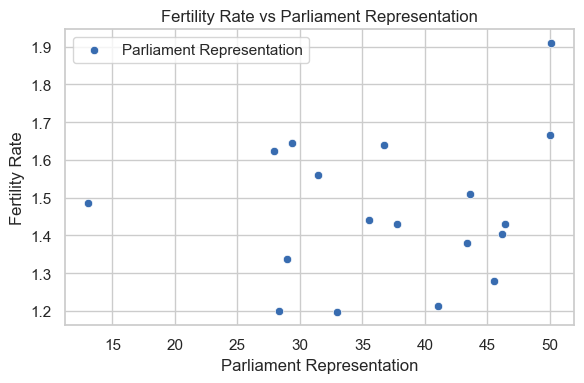

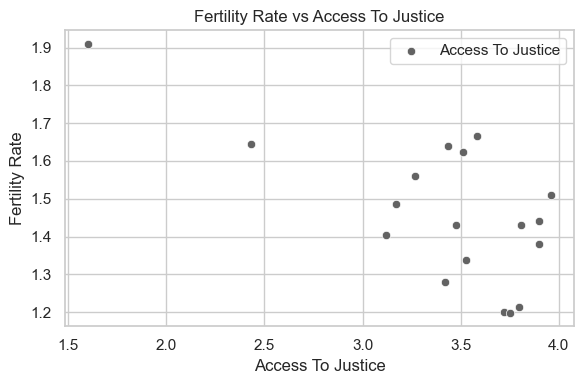

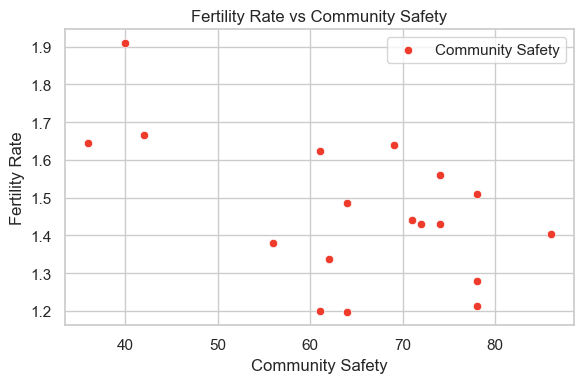

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

# Custom colors mapped to variables
custom_colors = {
    'parliament_representation': '#386CB0',  # Deep Navy Blue
    'access_to_justice': '#636363',          # Slate Gray
    'community_safety': '#EF3B2C'            # Warm Red
}

# New predictors to explore
predictors = ['parliament_representation', 'access_to_justice', 'community_safety']

# Scatterplots with color and legend
for col in predictors:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        x=df_merged[col],
        y=df_merged['Fertility_Rate'],
        color=custom_colors[col],
        label=col.replace('_', ' ').title()
    )
    plt.title(f'Fertility Rate vs {col.replace("_", " ").title()}')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Fertility Rate')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## Train/Test Split

### Set Up the Model Inputs

The data is cleaned and merged, I’m defining the inputs for the model. I’m using three predictors that I think reflect early signs of where policy might actually work: 
- `parliamentary representation` 
- `access to justice`
- `community safety`

These variables go into `X`, and the outcome I'm trying to predict fertility rate goes into `y`. This setup will let me see how well these civic indicators can explain where policy might be more effective.

In [232]:
# Define X (predictors) and y (target)
X = df_merged[['parliament_representation', 'access_to_justice', 'community_safety']]
y = df_merged['Fertility_Rate']

# Check shapes
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (18, 3)
y shape: (18,)


### Split the Data into Training and Test Sets

Splitting the data into a training set and a test set. The idea is to let the model learn from part of the data and then test how well it performs on data it hasn’t seen yet. This helps make sure the model isn’t just memorizing patterns and can actually generalize to new situations.

In [234]:
from sklearn.model_selection import train_test_split

# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Check the sizes of each set
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (12, 3)
X_test shape: (6, 3)


### Fit the Model

The data’s split, I’m creating the linear regression model and fitting it to the training set. This is where the model learns from the patterns in the data specifically how parliamentary representation, access to justice, and community safety relate to fertility rates. Let’s see what it picks up.

In [239]:
from sklearn.linear_model import LinearRegression

# Create the model object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

### Fit the Model

The training data is good to go, I’ve trained a linear regression model using the inputs I selected earlier —  
`parliamentary_representation`, `access_to_justice`, and `community_safety`.

This is the step where the model actually *learns* from the training data. It’s trying to find patterns that connect these early civic indicators to fertility rates. If there’s a signal in the data, this is where it’ll pick it up.

With the model trained, I’m ready to move on and see how it performs when I ask it to make predictions on new, unseen data.

---

### Make Predictions on the Test Set

I’ve now trained the model, I want to see how well it does on the test data. Basically, how it handles new situations it hasn’t seen before. This step will generate predicted fertility rates using the test set, and I’ll compare them to the actual values to see if the model is catching on to any patterns that could link policy indicators with fertility outcomes.

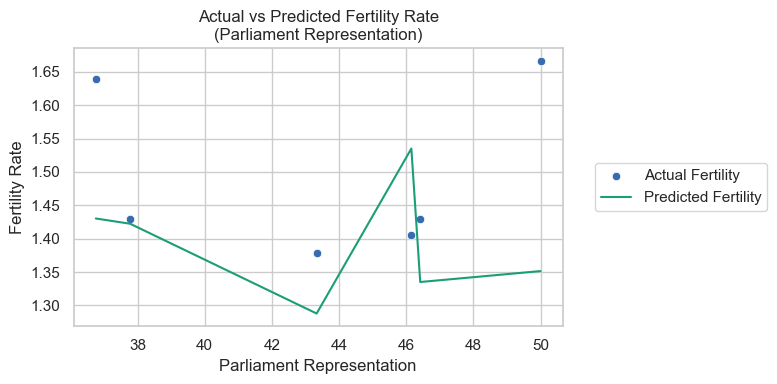

In [261]:
# Predict fertility rates using the test set
y_pred = model.predict(X_test)

# Plot: Actual vs Predicted Fertility Rate (based on Parliament Representation)
plt.figure(figsize=(8, 4))  # wider figure
sns.scatterplot(x=X_test['parliament_representation'], y=y_test, color='#386CB0', label='Actual Fertility')
sns.lineplot(x=X_test['parliament_representation'], y=y_pred, color='#1B9E77', label='Predicted Fertility')

plt.title('Actual vs Predicted Fertility Rate\n(Parliament Representation)', fontsize=12)
plt.xlabel('Parliament Representation')
plt.ylabel('Fertility Rate')

# Move legend further out to avoid squishing
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.tight_layout()
plt.show()

The model’s has made predictions, I want to evaluate how well it actually performed. I'm using two metrics for this: R² (coefficient of determination) and Mean Squared Error. 

- R² tells me how much of the variation in fertility rates can be explained by the predictors.
- MSE gives me a sense of how far off my predictions are from the actual values on average.

These numbers will help me understand if these civic indicators (like parliamentary representation, access to justice, and community safety) really tell us anything useful about where policy might be effective.

In [265]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.0296
R² Score: -1.2099


## Answer to 6.3 Research Question
---

### Model Performance Overview

Alright, here’s how the model did on the test set using two key metrics:

- **Mean Squared Error (MSE):** `0.0296`
- **R² Score:** `-1.2099`

Let’s break that down a bit:

---

#### R² Score: -1.2099

This one tells me how much of the variation in fertility rates the model could explain using:

- `parliament_representation`
- `access_to_justice`
- `community_safety`

But since the R² is *negative*, that actually means the model did worse than just guessing the average fertility rate for everything. So yeah... not great.

This tells me the model didn’t really pick up any strong patterns or at least, not ones that generalized to new data.

**Possible reasons?**
- The relationship might not be linear.
- The dataset could be too small to detect real patterns.
- Or maybe I’m missing some key variables that actually matter here.

---

#### Mean Squared Error (MSE): 0.0296

This measures how far off the predictions were, on average. It looks small at first glance, but in the context of fertility rates (which are clustered around 1.2 to 1.7), even small prediction errors can make a big difference.

That, combined with the negative R², tells me the model’s not giving reliable predictions so I wouldn’t use it to guide decisions just yet.

---

### What This Means for the Research Question

> **Are there early indicators (like trust in public institutions or civic participation) that predict where policy will be effective?**

Based on the model results **not really**, at least not when using fertility rate as the outcome.

That said, it doesn’t mean those indicators aren’t important. It might just mean:

- The relationship isn’t linear
- Fertility rate isn’t the best way to measure policy effectiveness in this context
- Or I need a bigger, richer dataset that brings in more social, cultural, or economic context

This was still a useful check now I know where things *don’t* connect, which helps sharpen the next step.

# ------------------------------------
## 6. What helps legal protections take hold in low-trust countries community-led initiatives? better communication? targeted investments?
# ------------------------------------

For this final part of the analysis, I’m trying to unpack what actually supports legal protections in low-trust countries. Is it community led efforts? Better access to communication? Or targeted economic investments?

To explore this, I’m using **intimate partner violence** as a real-world outcome. If legal protections are taking hold and being enforced, then rates of this kind of violence should ideally go down.

I chose three predictors, each tied to part of the question:

- `community_safety` → community-led initiatives
- `cell_phone_use_2022` → better communication
- `financial_inclusion_2021` → targeted investments

Now I want to see whether these indicators actually help explain lower rates of partner violence, or if the relationship isn’t that straightforward.

In [286]:
# Rename columns for consistency
wps = wps.rename(columns={
    'Community safety 2020-2022': 'community_safety',
    'Cell Phone Use 2022': 'cell_phone_use_2022',
    'Financial Inclusion 2021': 'financial_inclusion_2021',
    'Partner Violence 2018': 'intimate_partner_violence'
})

# Confirm changes
print(wps.columns.tolist())

['WPS Rank 2023', 'Country', 'WPS Index 2023', 'Education 2016-2021', 'Employment 2018 - 2022', 'financial_inclusion_2021', 'cell_phone_use_2022', 'Parl. Rep. 2023', 'Legal Equality 2023', 'Justice Access 2022', 'Maternal mortality 2020', ' Son bias 2022', 'intimate_partner_violence', 'community_safety', 'Violence vs Women 2022', 'Conflict Proximity 2021-2022']


In [288]:
# Define predictors (X) and target (y)
X = wps[['community_safety', 'cell_phone_use_2022', 'financial_inclusion_2021']]
y = wps['intimate_partner_violence']

# Confirm the shapes
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (210, 3)
y shape: (210,)


### Split the Data into Training and Test Sets

Now that I’ve got my predictors and target defined, it’s time to split the data. This step lets the model learn from one part of the data (training set) and then get tested on a completely separate part (test set).

That way, I can see how well the model actually *generalizes* not just how well it memorizes the patterns in the training data. Super important for figuring out if it would work on real-world scenarios.

In [292]:
from sklearn.model_selection import train_test_split

# Split: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Confirm the sizes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (147, 3)
X_test shape: (63, 3)
y_train shape: (147,)
y_test shape: (63,)


### Fit the Regression Model

This step trains the model using the training data. It’s where the algorithm looks at the patterns between the predictors I chose like communication access and community safety and the outcome variable: intimate partner violence.

Once it’s trained, I’ll be able to test how well it performs on unseen data.

In [308]:
# Combine X and y into one DataFrame temporarily
combined = pd.concat([X, y], axis=1)

# Drop rows with missing values
combined = combined.dropna()

# Split them back out
X_clean = combined[['community_safety', 'cell_phone_use_2022', 'financial_inclusion_2021']]
y_clean = combined['intimate_partner_violence']

# Confirm new shape
print(f"X_clean shape: {X_clean.shape}")

X_clean shape: (186, 3)


In [310]:
from sklearn.model_selection import train_test_split

# Re-split cleaned data
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.3, random_state=42
)

# Confirm the new shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (130, 3)
X_test shape: (56, 3)


### Train the Model
The model is now trained using the cleaned dataset. This is where it starts picking up on patterns between my predictors (like community safety, phone use, and financial inclusion) and the outcome I’m trying to understand intimate partner violence.

In [312]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [317]:
# Predict using the test set
y_pred = model.predict(X_test)

# Quick check
y_pred[:5]

array([12.83010452, 11.37577156, 10.20337841, 14.84218636, 14.84218636])

### Visualize Predictions vs Actual Values

Let’s plot the predicted intimate partner violence rates against the actual values in the test set.

This will help me see how close the model came to getting things right and whether it's picking up on any useful trends from the predictors.

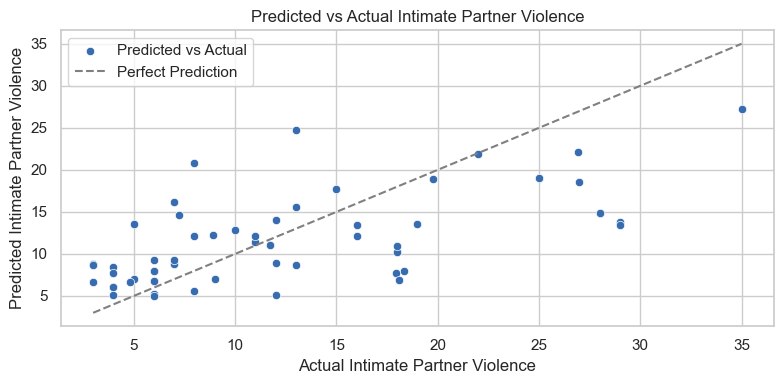

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatterplot of actual vs predicted
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_pred, color="#386CB0", label='Predicted vs Actual')

# Plot a reference line (perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray', label='Perfect Prediction')

plt.xlabel("Actual Intimate Partner Violence")
plt.ylabel("Predicted Intimate Partner Violence")
plt.title("Predicted vs Actual Intimate Partner Violence")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Evaluate Model Performance

Now that I’ve seen the visual comparison, I want to get a more concrete read on how the model is doing numerically.

R² will show how much of the variation in intimate partner violence can be explained by my predictors (community safety, phone use, and financial inclusion).

MSE gives me a sense of how far off the model’s predictions are from the actual values on average.

In [326]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate R² and MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Show the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 41.4407
R² Score: 0.3882


## Answer to 6.3 Research Question
---

### Interpreting the Final Research Question

The goal here was to see whether civic or infrastructure-related variables could explain where legal protections 
(like reducing intimate partner violence) might actually gain traction especially in places where trust in institutions is lower.

My model used three predictors:
- community_safety (as a stand-in for community-led initiatives),
- cell_phone_use_2022 (as a proxy for communication access), and
- financial_inclusion_2021 (for economic participation or targeted investments).

The R² score came out to 0.388 which means these variables explained about 39% of the variation in intimate partner violence rates.

That’s not bad for social data, but it’s not strong enough to say we’ve nailed the answer. What it *does* suggest is:
- These kinds of predictors may play a real role.
- Community safety especially might be pointing us toward something meaningful.
- There’s likely more going on we might need better or more granular data to capture the full picture.

So, while this model isn’t a crystal ball, it *does* give me a starting point to say: yes, things like safety, access, and inclusion 
might help legal protections actually take hold but the relationship isn’t simple, and it might not be linear.

---

## 7. Final Thoughts and Reflections

### Insights
Over the course of this analysis, I explored different ways that policies might work better when aligned with real-world social and cultural conditions. I tested whether things like parliamentary representation, access to justice, and community safety could predict fertility rates or intimate partner violence two different ways of thinking about policy impact.

- **Fertility Rates**: The model didn’t perform well here. The R² score was negative, which means the predictors didn’t really help explain fertility rates in a generalizable way. This might point to the complexity of the topic or that fertility isn’t the best outcome to model here.
  
- **Intimate Partner Violence**: This model had a better fit. With an R² of about 0.39, the predictors (community safety, phone use, and financial inclusion) explained some of the variation. It’s not perfect, but it does hint that community-focused and communication-based factors could matter in low-trust environments.

### Questions Moving Forward
- Would nonlinear models or interaction terms between variables improve the predictions?
- Are there other indicators like civic trust scores or grassroots engagement that would be better early flags for policy effectiveness?
- Could clustering countries by cultural or economic similarity improve model accuracy?

### Reflection on Data Bias
Any analysis like this is only as good as the data behind it. Some of the data sources have gaps, come from different years, or reflect national-level averages that might hide local realities. There’s also a risk of cultural bias what counts as “trust” or “violence” might look different depending on context, and measurement standards might vary across countries. These limitations are worth keeping in mind when interpreting the results.

This was a really useful exercise in seeing where models work and where they don’t when trying to answer questions about policy and society.